
Basic statistics:
        Bewoelkung   Temperatur  Windgeschwindigkeit
count  2617.000000  2617.000000          2617.000000
mean      4.800535    12.129737            11.184180
std       2.578128     7.176826             4.120566
min       0.000000   -10.250000             3.000000
25%       3.000000     6.528571             8.000000
50%       6.000000    12.000000            10.000000
75%       7.000000    17.862500            14.000000
max       8.000000    32.671428            35.000000


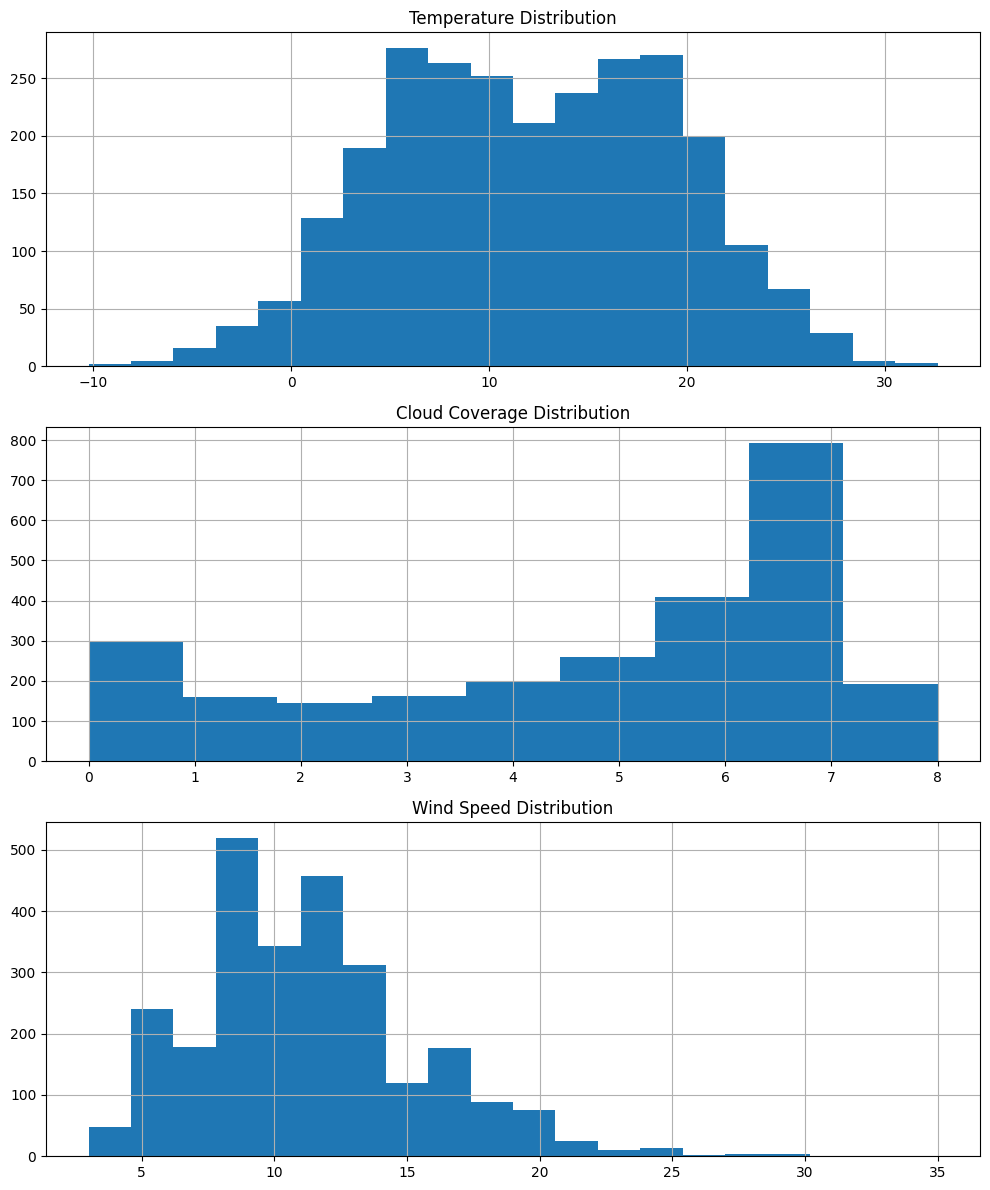

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data (adjust the path as needed)
df = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/07_Wetter/wetter_corr.csv')

# Basic statistics
print("\nBasic statistics:")
print(df[['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit']].describe())

# Create histograms
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

df['Temperatur'].hist(bins=20, ax=axes[0])
axes[0].set_title('Temperature Distribution')

df['Bewoelkung'].hist(bins=9, ax=axes[1])
axes[1].set_title('Cloud Coverage Distribution')

df['Windgeschwindigkeit'].hist(bins=20, ax=axes[2])
axes[2].set_title('Wind Speed Distribution')

plt.tight_layout()
plt.show()


In [2]:
# Create a copy of the dataframe to keep original data
df_binned = df.copy()

# Temperature binning
# Temperature (°C) - noting range is -10.25 to 32.67:

# Very Cold: < 0
# Cold: 0-10
# Mild: 10-20
# Warm: 20-25
# Hot: > 25
# Cloud Coverage (Bewölkung) - already 0-8, with mean around 4.8:

# Clear: 0-2
# Partly Cloudy: 3-5
# Cloudy: 6-8
# Wind Speed (Windgeschwindigkeit) - noting range is 3 to 35, with mean around 11:

# Light: ≤ 8
# Moderate: 9-15
# Strong: > 15

temp_bins = [-float('inf'), 0, 10, 20, 25, float('inf')]
temp_labels = ['Very_Cold', 'Cold', 'Mild', 'Warm', 'Hot']
df_binned['Temperatur_binned'] = pd.cut(df_binned['Temperatur'], 
                                       bins=temp_bins, 
                                       labels=temp_labels)

# Cloud coverage binning
cloud_bins = [-1, 2, 5, 8]  # -1 to include 0
cloud_labels = ['Clear', 'Partly_Cloudy', 'Cloudy']
df_binned['Bewoelkung_binned'] = pd.cut(df_binned['Bewoelkung'], 
                                       bins=cloud_bins, 
                                       labels=cloud_labels)

# Wind speed binning
wind_bins = [-float('inf'), 8, 15, float('inf')]
wind_labels = ['Light', 'Moderate', 'Strong']
df_binned['Windgeschwindigkeit_binned'] = pd.cut(df_binned['Windgeschwindigkeit'], 
                                                bins=wind_bins, 
                                                labels=wind_labels)

# Show the distribution of the binned categories
for col in ['Temperatur_binned', 'Bewoelkung_binned', 'Windgeschwindigkeit_binned']:
    print(f"\nDistribution of {col}:")
    print(df_binned[col].value_counts().sort_index())

df_binned


Distribution of Temperatur_binned:
Temperatur_binned
Very_Cold     102
Cold          992
Mild         1143
Warm          303
Hot            77
Name: count, dtype: int64

Distribution of Bewoelkung_binned:
Bewoelkung_binned
Clear             603
Partly_Cloudy     621
Cloudy           1393
Name: count, dtype: int64

Distribution of Windgeschwindigkeit_binned:
Windgeschwindigkeit_binned
Light        753
Moderate    1464
Strong       400
Name: count, dtype: int64


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Temperatur_binned,Bewoelkung_binned,Windgeschwindigkeit_binned
0,2012-01-01,8.0,9.8250,14,58.0,Cold,Cloudy,Moderate
1,2012-01-02,7.0,7.4375,12,NaN,Cold,Cloudy,Moderate
2,2012-01-03,8.0,5.5375,18,63.0,Cold,Cloudy,Strong
3,2012-01-04,4.0,5.6875,19,80.0,Cold,Partly_Cloudy,Strong
4,2012-01-05,6.0,5.3000,23,80.0,Cold,Cloudy,Strong
...,...,...,...,...,...,...,...,...
2612,2018-10-13,1.0,23.0000,13,NaN,Warm,Clear,Moderate
2613,2018-10-14,1.0,21.0000,14,NaN,Warm,Clear,Moderate
2614,2018-10-20,3.0,13.4000,10,NaN,Mild,Partly_Cloudy,Moderate
2615,2018-10-21,8.0,14.1000,9,NaN,Mild,Cloudy,Moderate


In [3]:
# One-hot encode
df_encoded = pd.get_dummies(df_binned, 
                           columns=['Temperatur_binned', 
                                  'Bewoelkung_binned', 
                                  'Windgeschwindigkeit_binned'],
                           prefix=['Temp', 'Cloud', 'Wind'])

# Convert only the one-hot encoded columns to int
bool_columns = [col for col in df_encoded.columns if df_encoded[col].dtype == bool]
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

df_encoded


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Temp_Very_Cold,Temp_Cold,Temp_Mild,Temp_Warm,Temp_Hot,Cloud_Clear,Cloud_Partly_Cloudy,Cloud_Cloudy,Wind_Light,Wind_Moderate,Wind_Strong
0,2012-01-01,8.0,9.8250,14,58.0,0,1,0,0,0,0,0,1,0,1,0
1,2012-01-02,7.0,7.4375,12,NaN,0,1,0,0,0,0,0,1,0,1,0
2,2012-01-03,8.0,5.5375,18,63.0,0,1,0,0,0,0,0,1,0,0,1
3,2012-01-04,4.0,5.6875,19,80.0,0,1,0,0,0,0,1,0,0,0,1
4,2012-01-05,6.0,5.3000,23,80.0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,2018-10-13,1.0,23.0000,13,NaN,0,0,0,1,0,1,0,0,0,1,0
2613,2018-10-14,1.0,21.0000,14,NaN,0,0,0,1,0,1,0,0,0,1,0
2614,2018-10-20,3.0,13.4000,10,NaN,0,0,1,0,0,0,1,0,0,1,0
2615,2018-10-21,8.0,14.1000,9,NaN,0,0,1,0,0,0,0,1,0,1,0


In [4]:
# Wettercode wurde entfernt, da zuviele missing values


# Add weather code binning to the existing binned dataframe
# Good Weather (codes 0-2: clear/fair conditions)
# Moderate Weather (codes 3-10: cloudy/hazy but dry)
# Light Weather Issues (codes 11-69: fog, light rain, light snow - might slightly reduce foot traffic)
# Severe Weather (codes 70-99: heavy precipitation, storms - likely to significantly reduce foot traffic)


# def categorize_weather(code):
#     if pd.isna(code):
#         return 'Unknown'
#     code = int(code)
#     if 0 <= code <= 2:
#         return 'Good'
#     elif 3 <= code <= 10:
#         return 'Moderate'
#     elif 11 <= code <= 69:
#         return 'Light_Issues'
#     elif 70 <= code <= 99:
#         return 'Severe'
#     else:
#         return 'Unknown'

# # Add the weather category to the dataframe
# df_binned['Wettercode_binned'] = df_binned['Wettercode'].apply(categorize_weather)

# # Add this to the one-hot encoding
# df_encoded = pd.get_dummies(df_binned, 
#                            columns=['Temperatur_binned', 
#                                   'Bewoelkung_binned', 
#                                   'Windgeschwindigkeit_binned',
#                                   'Wettercode_binned'],
#                            prefix=['Temp', 'Cloud', 'Wind', 'Weather'])

# # Convert boolean columns to int
# bool_columns = [col for col in df_encoded.columns if df_encoded[col].dtype == bool]
# df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

# df_encoded.head()


In [5]:
# Spalten entfernen die nicht gebraucht werden

df_encoded = df_encoded.drop(['Temperatur', 'Bewoelkung', 'Windgeschwindigkeit', 'Wettercode'], axis=1)
df_encoded

,Datum,Temp_Very_Cold,Temp_Cold,Temp_Mild,Temp_Warm,Temp_Hot,Cloud_Clear,Cloud_Partly_Cloudy,Cloud_Cloudy,Wind_Light,Wind_Moderate,Wind_Strong
0,2012-01-01,0,1,0,0,0,0,0,1,0,1,0
1,2012-01-02,0,1,0,0,0,0,0,1,0,1,0
2,2012-01-03,0,1,0,0,0,0,0,1,0,0,1
3,2012-01-04,0,1,0,0,0,0,1,0,0,0,1
4,2012-01-05,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2612,2018-10-13,0,0,0,1,0,1,0,0,0,1,0
2613,2018-10-14,0,0,0,1,0,1,0,0,0,1,0
2614,2018-10-20,0,0,1,0,0,0,1,0,0,1,0
2615,2018-10-21,0,0,1,0,0,0,0,1,0,1,0


In [6]:
# Check which columns have NaNs
df_encoded.isnull().any()

Datum                  False
Temp_Very_Cold         False
Temp_Cold              False
Temp_Mild              False
Temp_Warm              False
Temp_Hot               False
Cloud_Clear            False
Cloud_Partly_Cloudy    False
Cloud_Cloudy           False
Wind_Light             False
Wind_Moderate          False
Wind_Strong            False
dtype: bool

In [7]:
#CSV erstellen:
df_encoded.to_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/07_Wetter/07_wetter.csv', index=False)